<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_3/Chapter3_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [83]:
import numpy as np
from sklearn.datasets import fetch_openml

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import (StratifiedKFold, 
                                     cross_val_score, 
                                     cross_val_predict)

from sklearn.metrics import (confusion_matrix, 
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             precision_recall_curve, 
                             roc_curve, 
                             roc_auc_score)

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

# Data

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
type(mnist)

sklearn.utils.Bunch

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [12]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X.shape, y.shape

((70000, 784), (70000,))

5


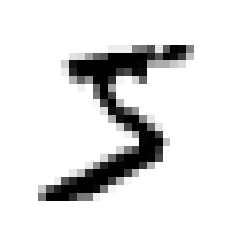

In [13]:
some_idx = 0
some_digit, some_label = X[some_idx], y[some_idx]
some_digit_img = some_digit.reshape(28, 28)

print(some_label)

plt.imshow(some_digit_img, cmap="binary")
plt.axis("off")
plt.show()

# Train Test Split

Data is shuffled already by sklearn

In [14]:
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

# Training a Binary Classifier

This is a classifier for the digit 5

In [16]:
y_train = (y_train == 5)
y_test = (y_test == 5)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [18]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

### Stratified K-Fold Cross Validation

**Manually**

In [24]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

fold_no = 0
for train_idx, test_idx in skfolds.split(X_train, y_train):
  fold_no = fold_no + 1

  X_train_fold = X_train[train_idx]
  y_train_fold = y_train[train_idx]

  X_test_fold = X_train[test_idx]
  y_test_fold = y_train[test_idx]
  
  sgd_clf = SGDClassifier(random_state=42).fit(X_train_fold, y_train_fold)
  y_pred_fold = sgd_clf.predict(X_test_fold)
  fold_acc = (y_test_fold == y_pred_fold).sum() / y_test_fold.shape[0]
  
  print(f"Fold {fold_no} accuracy = {round(fold_acc*100, 3)}%")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Fold 1 accuracy = 95.035%
Fold 2 accuracy = 96.035%
Fold 3 accuracy = 96.04%


**Using Sklearn**

In [26]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

cross_val_score(sgd_clf, X=X_train, y=y_train, scoring="accuracy", cv=3)

array([0.95035, 0.96035, 0.9604 ])

### Confusion Matrix

In [29]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

y_pred_cross_val = cross_val_predict(sgd_clf, X=X_train, y=y_train, cv=3)

confusion_matrix(y_true=y_train, y_pred=y_pred_cross_val)

array([[53892,   687],
       [ 1891,  3530]])

### Precision, Recall and F1-Score

In [31]:
precision_score(y_true=y_train, y_pred=y_pred_cross_val)

0.8370879772350012

In [32]:
recall_score(y_true=y_train, y_pred=y_pred_cross_val)

0.6511713705958311

In [34]:
f1_score(y_true=y_train, y_pred=y_pred_cross_val)

0.7325171197343846

In [39]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.figure(figsize=(8, 5))
  
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  
  plt.xlabel("Thresholds", size=15)
  plt.title("Precision, Recall for different Thresholds", size=20)

  plt.legend()
  plt.show()

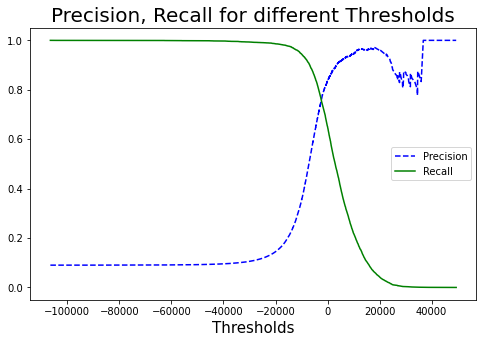

In [40]:
y_scores = cross_val_predict(sgd_clf, 
                             X=X_train, y=y_train, 
                             cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_true=y_train, 
                                                         probas_pred=y_scores)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

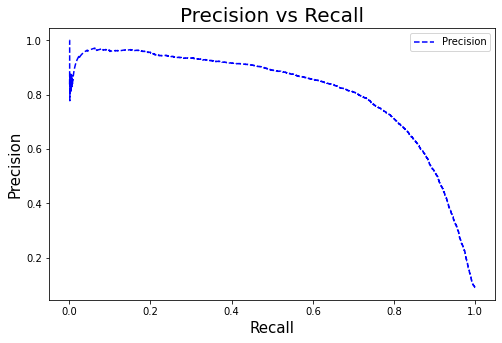

In [41]:
plt.figure(figsize=(8, 5))
  
plt.plot(recalls[:-1], precisions[:-1], "b--", label="Precision")
  
plt.ylabel("Precision", size=15)
plt.xlabel("Recall", size=15)
plt.title("Precision vs Recall", size=20)

plt.legend()
plt.show()

In [44]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [45]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [46]:
precision_score(y_true=y_train, y_pred=y_train_pred_90)

0.9000345901072293

In [47]:
recall_score(y_true=y_train, y_pred=y_train_pred_90)

0.4799852425751706

### Receiver Operating Characteristics (ROC) Curve

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.figure(figsize=(8, 5))
  
  plt.plot(fpr, tpr, "b")
  plt.plot([0, 1], [0, 1], "k--", label="Model with random predictions")

  plt.xlabel("False Positive Rate (1-Specificity)", size=15)
  plt.ylabel("True Positive Rate (Recall/Sensitivity)", size=15)
  plt.title("ROC Curve", size=20)

  plt.legend()
  plt.show()

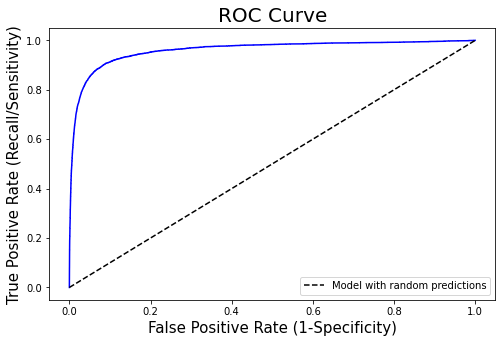

In [57]:
fpr, tpr, thresholds = roc_curve(y_true=y_train, y_score=y_scores)

plot_roc_curve(fpr, tpr, label=None)

In [59]:
roc_auc_score(y_true=y_train, y_score=y_scores)

0.9604938554008616

### Training Random Forest Classifier and Comparing Metrics

In [62]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, 
                                    X=X_train, y=y_train, 
                                    cv=3, method="predict_proba")
y_probas_forest[:5]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01]])

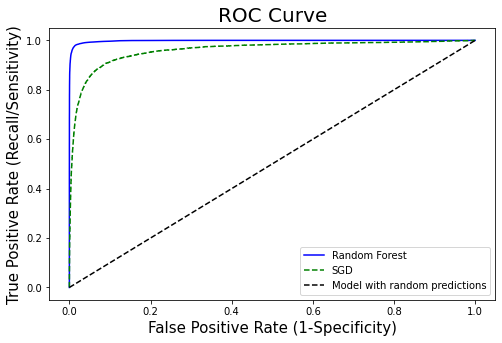

In [65]:
y_scores_forest = y_probas_forest[:, 1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_true=y_train, 
                                                      y_score=y_scores_forest)


fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_forest, tpr_forest, "b", label="Random Forest")
ax.plot(fpr, tpr, "g--", label="SGD")
ax.plot([0, 1], [0, 1], "k--", label="Model with random predictions")

ax.set_xlabel("False Positive Rate (1-Specificity)", size=15)
ax.set_ylabel("True Positive Rate (Recall/Sensitivity)", size=15)
ax.set_title("ROC Curve", size=20)

ax.legend()
plt.show()

In [66]:
roc_auc_score(y_true=y_train, y_score=y_scores_forest)

0.9983436731328145

# Multiclass Classification

**Data**

In [69]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## SVM Classifier

**Uses One-vs-One (OvO) natively**

In [70]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [72]:
svm_clf.decision_function([some_digit])

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [73]:
np.argmax(svm_clf.decision_function([some_digit]))

5

In [74]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [75]:
svm_clf.classes_[np.argmax(svm_clf.decision_function([some_digit]))]

5

**If want to use One-vs-Rest (OvR)**

Will take time

In [76]:
# from sklearn.multiclass import OneVsRestClassifier
# ovr_clf = OneVsRestClassifier(SVC())
# ovr_clf.fit(X_train, y_train)
# ovr_clf.predict([some_digit])

In [77]:
# len(ovr_clf.estimators_)

In [78]:
## SGD Multiclass Classifier

## SGD Multiclass Classifier

In [79]:
sgc_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [80]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [81]:
cross_val_score(sgd_clf, 
                X=X_train, y=y_train, 
                cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

**Cross Val Score with Scaling**

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, 
                X=X_train_scaled, y=y_train, 
                cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Error Analysis

In [86]:
y_train_predict = cross_val_predict(sgd_clf, 
                                    X=X_train, y=y_train, 
                                    cv=3)
conf_mx = confusion_matrix(y_true=y_train, y_pred=y_train_predict)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

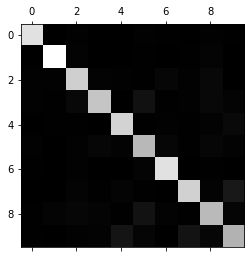

In [87]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

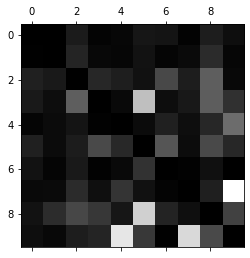

In [88]:
norm_conf_mx = conf_mx / conf_mx.sum(axis=1, keepdims=True)

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel Classification

# Multioutput Classification